#Day 6 Lesson

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as st
import math

#### Single Regression

In [ ]:
df = pd.read_csv('http://data-analytics.zybooks.com/Reaction.csv') 
df

,Drinks,Reaction
0,0,6
1,1,12
2,3,18
3,6,33
4,6,42
5,8,57


In [ ]:
modelUsingSciPy = st.linregress(df['Drinks'],df['Reaction'])

print(modelUsingSciPy)

LinregressResult(slope=6.000000000000001, intercept=3.9999999999999964, rvalue=0.9728166526882823, pvalue=0.0010983582017795293, stderr=0.7141428428542851, intercept_stderr=3.5227829907617076)


This provides a bare-bones regression object. It's fairly ugly, and I simply would not recommend using this particular package for that reason.  I  also note values $< 10^{-10}$ tend to start sinking in to "machine rounding errors", you can investigate that as you like. 

**However**, from a teaching perspective, this function does allow us to ensure that you are aware of what each of the regression components are and where they belong.

We should discuss here: 

*  What is the impact of another drink? 
*  What is the reaction with no drinks?
*  Is the impact significantly different than 0?

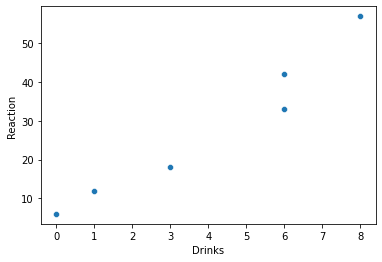

In [ ]:
scatterBasic = sns.scatterplot(x = df['Drinks'], y = df['Reaction'])

We should be able to identify the SLOPE of the line, (think the M in y=mx+b) and the intercept, (think the B in y=mx+b).

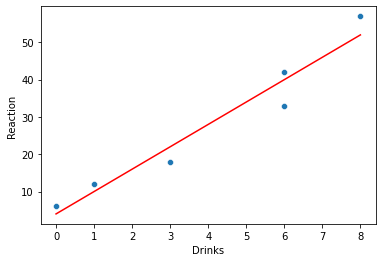

In [ ]:
scatterBasic = sns.scatterplot(x = df['Drinks'], y = df['Reaction'])
intercept = 3.9999999999999964
slope = 6.000000000000001
X_plot = np.linspace(0, 8, 5)
Y_plot = slope*X_plot+intercept
plt.plot(X_plot, Y_plot, color='r')
plt.show()

##### Confidence and Prediction Intervals

We should be able to construct the confidence interval for the mean, given the equation.

$\hat{Y} \pm t_{n-2} s_y \sqrt{\frac{1}{n}+\frac{(x-\bar{x})^2}{(n-1)s_x^2}}$

In [ ]:
def buildCI(x, nIn, tIn, stdYIn, stdXIn, xBarIn): #make sure you always use fresh definition terms. Defs should be done immediately after instantiation, but I do it here so you can folow my logic.
  out = tIn * stdYIn * math.sqrt( 1/nIn + (x - xBarIn)**2 / ((nIn - 1) * stdYIn**2) )
  return(out)

vBuildCI = np.vectorize(buildCI)

In [ ]:
n = 5
t_95pct = st.t.ppf(0.95,n-2) #Reverse t-score lookup.
stdY = df['Reaction'].std()
stdX = df['Drinks'].std()
xBar = df['Drinks'].mean()

vBuildCI(X_plot, n, t_95pct, stdY, stdX, xBar) #needed so the command that takes 1 "x" imput not 

array([21.0596444 , 20.66140517, 20.52694191, 20.66140517, 21.0596444 ])

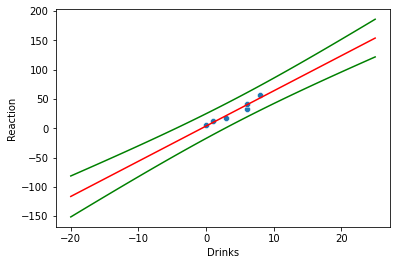

In [ ]:
scatterBasic = sns.scatterplot(x = df['Drinks'], y = df['Reaction'])
X_plot_detailed = np.linspace(-20, 25, 100)
Y_plot = slope*X_plot_detailed+intercept
plt.plot(X_plot_detailed, Y_plot, color='r')
plt.plot(X_plot_detailed, Y_plot + vBuildCI(X_plot_detailed, n, t_95pct, stdY, stdX, xBar), color='g')
plt.plot(X_plot_detailed, Y_plot - vBuildCI(X_plot_detailed, n, t_95pct, stdY, stdX, xBar), color='g')
plt.show()

This confidence interval means the red line: $E(Reaction|Drinks)$ falls within these bounds 95% of the time.

If you draw the prediction interval, it looks like this:

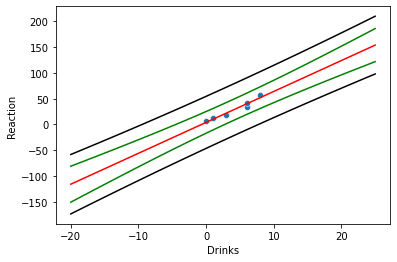

You can guess why I haven't shown you the code for the figure.

In [ ]:
model = smf.ols('Reaction ~ Drinks', data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Reaction   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     70.59
Date:                Thu, 09 Mar 2023   Prob (F-statistic):            0.00110
Time:                        01:27:41   Log-Likelihood:                -17.013
No. Observations:                   6   AIC:                             38.03
Df Residuals:                       4   BIC:                             37.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0000      3.523      1.135      0.3

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


We should discuss here: 

*  What is the impact of another drink? 
*  What is the reaction with no drinks?
*  Is the impact significantly different than 0?

Where do we look to read these items?

#### Multiple regression

In [ ]:
X = df['Drinks'].values
Y = df['Reaction'].values
X = np.vstack((np.ones(len(X)), X)).T #Adding intercept term and transposing. My training typically prefers rows = # of obs and columns = number of B's
varMat = np.linalg.inv( X.T.dot(X) ) #Variance matrix
covMat = X.T.dot(Y) #Covariance matrix

# print(X) #Bug checking. To be deleted on final presentation to client. (Show to students to demonstrate process.)
# print(X.T)
# print(X.T.dot(X))
# print( varMat ) 
# print( covMat ) 

print( "Final Beta0 and Beta1:", covMat.dot(varMat) )

Final Beta0 and Beta1: [4. 6.]


In [ ]:
houseDF = pd.read_csv('sample_data/california_housing_train.csv') 
houseDF

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
modelHouse = smf.ols('median_house_value ~ population + total_rooms + housing_median_age', data = houseDF).fit()

print(modelHouse.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     796.5
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:55:33   Log-Likelihood:            -2.2124e+05
No. Observations:               17000   AIC:                         4.425e+05
Df Residuals:                   16996   BIC:                         4.425e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.432e+05   2763

Activities:


*   Take notes, I expect at least 3 explorations in the code.
*   Create the prediction-interval creating function.  Map it and demonstrate you create the same figure as I did.
*   Rewrite the confidence-interval function, removing any/all uneeded function arguments (it can be trimmed up quite a bit). Remember never to reuse arguments names that have already been used.
*   Create a catagorical variable and include it in the regression. Interpret the result.
*   Create an interaction term and include it in the regression. Interpret the result.